# SCINApy示例

## 加载示例数据

In [1]:
from SCINApy import load_sample_data

adata, signatures, true_label = load_sample_data()
adata

FileNotFoundError: [Errno 2] No such file or directory: 'data/true_label.csv'

## SCINA算法自动注释

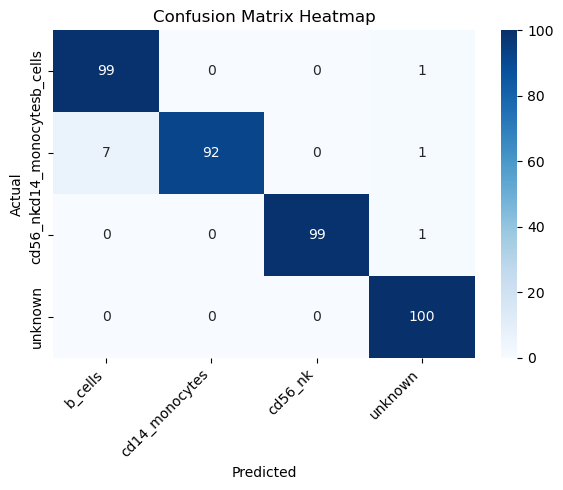

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from SCINApy import SCINA, load_sample_data

# 加载示例数据
adata, signatures, true_label = load_sample_data()

# 输出结果label
result = SCINA(adata=adata, signatures=signatures)

# 获取类别标签
labels = sorted(set(true_label)) 

# 定义混淆矩阵
conf_matrix = confusion_matrix(true_label, result["cell_labels"], labels=labels)

# 绘制热图
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels, cbar=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# 保存热图为 PNG
plt.savefig("data/confusion_matrix_heatmap_python.png")
plt.show()